# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [4]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

image "29739" in the training set
has a "25" label
corespond to "Road work" 


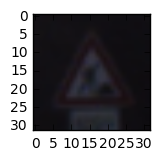

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline

r = np.random.randint(0,n_train-1)
with open('signnames.csv', 'r') as f:
    _list = list(csv.reader(f))
    del _list[0]
    
print("image \"{}\" in the training set".format(r))
print("has a \"{}\" label".format(y_train[r]))
print("corespond to \"{}\" ".format( _list[y_train[r]][1] ) )
image = X_train[r]
plt.figure(figsize=(1.5,1.5))
plt.imshow(image)
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
X_train = (X_train - 127.5) / 127.5 #zero mean and equal variance


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 

I forced the inputs image to have zero mean and equal variance in order to avoid numerical issues and to make much easier to the optimization as said in some lesson of this ND. I used 127.5 and not 128 because for the 255 value I didnt get one as a result. 

I considered to use the luminance Y or YUV channels as paper [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) got the best results using it. But as I have read [here](https://en.wikipedia.org/wiki/YUV) that color space take human perception into account, and as human brain and convNet are not the same, I decided to use RGB. In case that YUV can be better I expect that the convNet make the conversion automatically in some way. 

May be in a grayscale image, the traffic signs can be distinguished, but I believe that a color can be a good feature to more confidence classifier.

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

n = []
for i in range(n_classes):
    n_examples = np.count_nonzero(y_train == i)
    n_tracks = n_examples/30
    n.append(n_tracks)
print(n)

m = 33
n_examples = np.count_nonzero(y_train == m)
print("number of instances of class {} = {}".format(m , n_examples))
s = int(sum(n[0:m+1]))
print((s)*30)

[7.0, 74.0, 75.0, 47.0, 66.0, 62.0, 14.0, 48.0, 47.0, 49.0, 67.0, 44.0, 70.0, 72.0, 26.0, 21.0, 14.0, 37.0, 40.0, 7.0, 12.0, 11.0, 13.0, 17.0, 9.0, 50.0, 20.0, 8.0, 18.0, 9.0, 15.0, 26.0, 8.0, 22.966666666666665, 14.0, 40.0, 13.0, 7.0, 69.0, 10.0, 12.0, 8.0, 8.0]
number of instances of class 33 = 689
33750


In [8]:
r = 33750+28 #the last intance of the incomplete class 
print(r)

#add the a copy of that instance
ins_x = X_train[r,:,:,:]
ins_y = y_train[r]
X_train = np.insert(X_train, r, ins_x, 0) 
y_train = np.insert(y_train, r, ins_y, 0)


33778


In [9]:
#This code is to prove that I have all track complete
n = []
for i in range(n_classes):
    n_examples = np.count_nonzero(y_train == i)
    n_tracks = n_examples/30
    n.append(n_tracks)
print(n)

m = 33
n_examples = np.count_nonzero(y_train == m)
print("number of instances of class {} = {}".format(m , n_examples))
s = int(sum(n[0:m+1]))
print((s)*30)

[7.0, 74.0, 75.0, 47.0, 66.0, 62.0, 14.0, 48.0, 47.0, 49.0, 67.0, 44.0, 70.0, 72.0, 26.0, 21.0, 14.0, 37.0, 40.0, 7.0, 12.0, 11.0, 13.0, 17.0, 9.0, 50.0, 20.0, 8.0, 18.0, 9.0, 15.0, 26.0, 8.0, 23.0, 14.0, 40.0, 13.0, 7.0, 69.0, 10.0, 12.0, 8.0, 8.0]
number of instances of class 33 = 690
33780


In [10]:
#This cell take the indices of random track of each class
n = []
idxs_validation = []
for i in range(n_classes):
    n_examples = np.count_nonzero(y_train == i)
    n_tracks = n_examples/30
    n.append(n_tracks)
    s = int(sum(n[0:i]))
    r = np.random.randint(n_tracks) + s
    idxs_validation.extend( list(range((r*30),(r*30)+30)) )

In [11]:
#Generate the validation set
X_validation = X_train[idxs_validation,:,:,:]
y_validation = y_train[idxs_validation]

#Generate the new training set
idxs_train = list(range(n_train+1)) #a list of number from 0 to n_train+1 'cause we add one instance
idxs_train = list(set(idxs_train) - set(idxs_validation)) # obtein the real index to the new training set
X_train = X_train[idxs_train,:,:,:]

y_train = y_train[idxs_train]

image "100" in the validation set
has a "3" label
corespind to "Speed limit (60km/h)" 


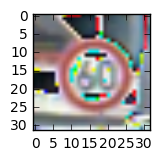

In [12]:
#Visual verification of the validation set 
r = 100
image = X_validation[r,:,:,:]
print("image \"{}\" in the validation set".format(r))
print("has a \"{}\" label".format(y_validation[r]))
print("corespind to \"{}\" ".format( _list[y_validation[r]][1] ) )
plt.figure(figsize=(1.5,1.5))
plt.imshow(image)
plt.show()

In [13]:
### Some info of the sets

n_train = len(X_train)

n_test = len(X_test)

n_validation = len(X_validation)


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Number of classes =", n_classes)

Number of training examples = 37920
Number of testing examples = 12630
Number of validation examples = 1290
Number of classes = 43


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I selected one track of each class to make the validation set as suggested  in the [paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) in order to make a more realistic validation set. I made that randomly. I noticed that the class 33 has an error, one track isn't complete. So I added a copy of one instance to that class to training set before set up the sets.

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128

In [14]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = .1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [15]:
from tensorflow.contrib.layers import flatten

def InseptionNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    """
    Begin inseption module
    """

    # Average pooling following by 1x1 conv:
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    inc1 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # 1x1 convolution. Input = 5x5x16. Output = 5x5x3.
    conv_inc1_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 16, 3), mean = mu, stddev = sigma))
    conv_inc1_b = tf.Variable(tf.zeros(3))
    inc1   = tf.nn.conv2d(inc1, conv_inc1_W, strides=[1, 1, 1, 1], padding='VALID') + conv_inc1_b
    inc1 = tf.nn.relu(inc1)
    
    # 1x1 convolution. Input = 10x10x16. Output = 10x10x3.
    conv_inc2_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 16, 3), mean = mu, stddev = sigma))
    conv_inc2_b = tf.Variable(tf.zeros(3))
    inc2   = tf.nn.conv2d(conv2, conv_inc2_W, strides=[1, 1, 1, 1], padding='VALID') + conv_inc2_b
    inc2 = tf.nn.relu(inc2)
    
    # 1x1 convolution folled by 3x3 convolution. Input = 10x10x3. Output = 8x8x3
    conv_inc3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 3), mean = mu, stddev = sigma))
    conv_inc3_b = tf.Variable(tf.zeros(3))
    inc3   = tf.nn.conv2d(inc2, conv_inc3_W, strides=[1, 1, 1, 1], padding='VALID') + conv_inc3_b
    inc3 = tf.nn.relu(inc3)
    
    # 1x1 convolution folled by 5x5 convolution. Input = 10x10x3. Output = 6x6x3
    conv_inc4_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 3), mean = mu, stddev = sigma))
    conv_inc4_b = tf.Variable(tf.zeros(3))
    inc4   = tf.nn.conv2d(inc2, conv_inc4_W, strides=[1, 1, 1, 1], padding='VALID') + conv_inc4_b
    inc4 = tf.nn.relu(inc4)
    
    # Concatenate. Output = (5x5x3) + (10x10x3) + (8x8x3) +(6x6x3) = 675.
    fc0 = tf.concat(1, [flatten(inc1), flatten(inc2), flatten(inc3), flatten(inc4)])
    
    """
    Finish inseption module
    """
    
    # SOLUTION: Layer 3: Fully Connected. Input = 675. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(675, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [15]:
from tensorflow.contrib.layers import flatten

def LeNetDrop(x, keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    #Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    #Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [17]:
from tensorflow.contrib.layers import flatten

def PieNetDrop(x, keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x108. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x200. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc_conv2   = flatten(conv2)
    
    # Flatten. Input = 14x14x6. Output = 1176.
    fc_conv1   = flatten(conv1)
    
    # Combination Output = 400 + 1176 = 1576
    fc0 = tf.concat(1, [fc_conv2, fc_conv1])
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1576. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1576, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    #Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    #Dropout
    fc2 = tf.nn.dropout(fc, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [18]:
from tensorflow.contrib.layers import flatten

def PieNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x108.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 108), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(108))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x108. Output = 14x14x108.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x200.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 108, 200), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(200))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x200. Output = 5x5x200.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x200. Output = 5000.
    fc_conv2   = flatten(conv2)
    
    # Flatten. Input = 14x14x108. Output = 21168.
    fc_conv1   = flatten(conv1)
    
    # Combination Output = 26168
    fc0 = tf.concat(1, [fc_conv2, fc_conv1])
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(26168, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [19]:
from tensorflow.contrib.layers import flatten

def tLeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    """
    Layer 1:
    """
    # Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    """
    Layer 2:
    """
    # Convolutional. Input = 14x14x6. Output = 12x12x6.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 6), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(6))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    
    """
    Layer 3:
    """
    # Convolutional. Input = 12x12x6. Output = 10x10x16.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 16), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(16))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv3)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [16]:
"""
`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.
"""

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32, None)

one_hot_y = tf.one_hot(y, 43)

In [17]:
"""
Create a training pipeline that uses the model to classify trafic signs.
"""

rate = 0.001

logits = LeNetDrop(x, keep_prob)
#logits = LeNet(x)
#logits = PieNet(x)
#logits = tLeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [18]:
"""
Evaluate how well the loss and accuracy of the model for a given dataset
"""
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [23]:
"""
This cell is to run a model without training. 
The paper sugest that it correlates good with the final performance of the arquitecture
"""

with tf.Session() as sess:
    validation_accuracy = 0
    for i in range(10):
        sess.run(tf.global_variables_initializer())
        validation_accuracy += evaluate(X_validation, y_validation)
    validation_accuracy /= 10
    #validation_accuracy = evaluate(X_train, y_train)
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))

Validation Accuracy = 0.030


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I used the LeNet architecture, two convolutional layers (each one was followed by pooling operation) followed by two full connected layers. The pooling operation chosen was max-pooling with the same stride and step equal two. Every activation function used was ReLu.

Training...

EPOCH 1 ...
Validation Accuracy = 0.421
Training Accuracy = 0.620
Saving model...
Model saved


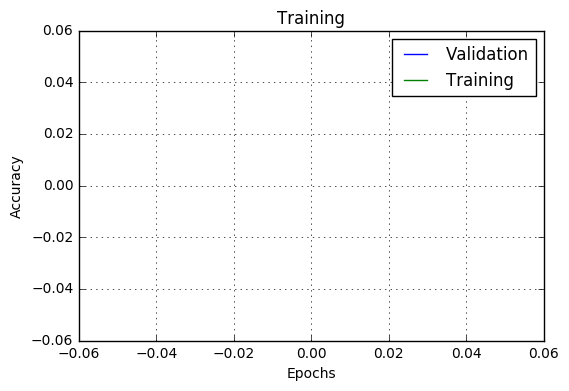


EPOCH 2 ...
Validation Accuracy = 0.743
Training Accuracy = 0.830
Saving model...
Model saved


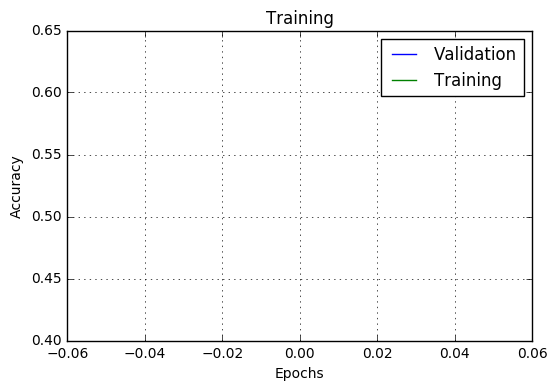


EPOCH 3 ...
Validation Accuracy = 0.844
Training Accuracy = 0.912
Saving model...
Model saved


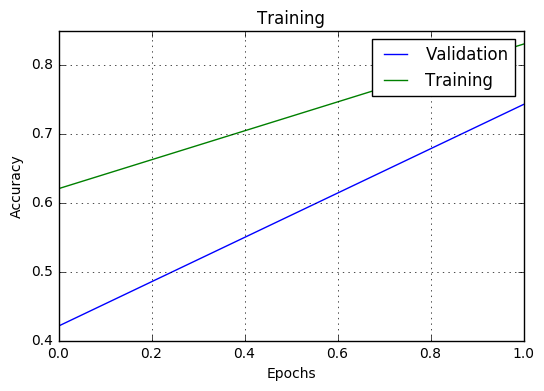


EPOCH 4 ...
Validation Accuracy = 0.871
Training Accuracy = 0.936
Saving model...
Model saved


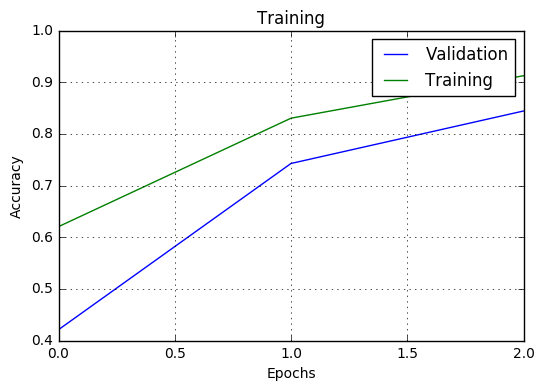


EPOCH 5 ...
Validation Accuracy = 0.916
Training Accuracy = 0.951
Saving model...
Model saved


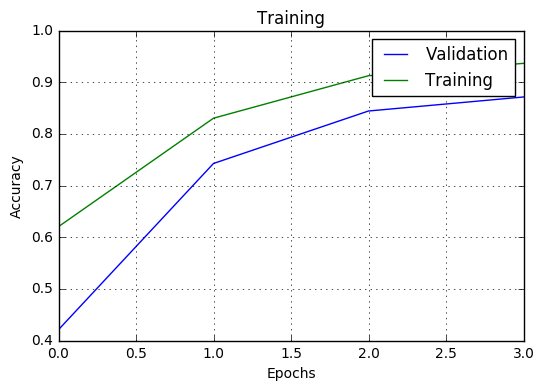


EPOCH 6 ...
Validation Accuracy = 0.926
Training Accuracy = 0.964
Saving model...
Model saved


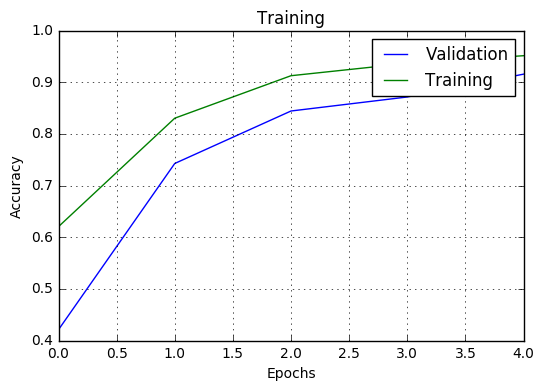


EPOCH 7 ...
Validation Accuracy = 0.943
Training Accuracy = 0.969
Saving model...
Model saved


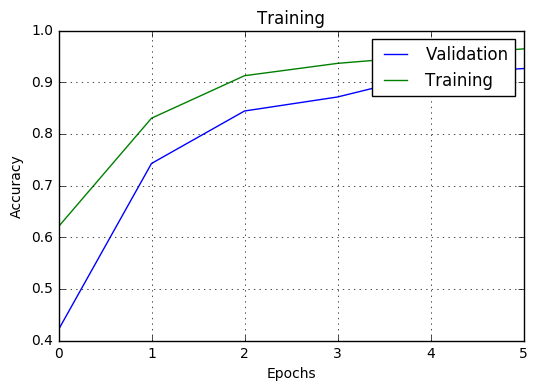


EPOCH 8 ...
Validation Accuracy = 0.941
Training Accuracy = 0.975
Saving model...
Model saved


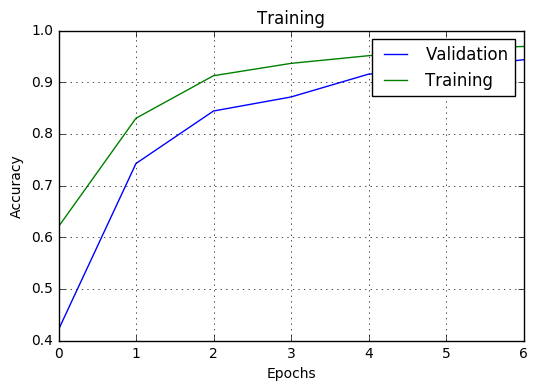


EPOCH 9 ...
Validation Accuracy = 0.948
Training Accuracy = 0.977
Saving model...
Model saved


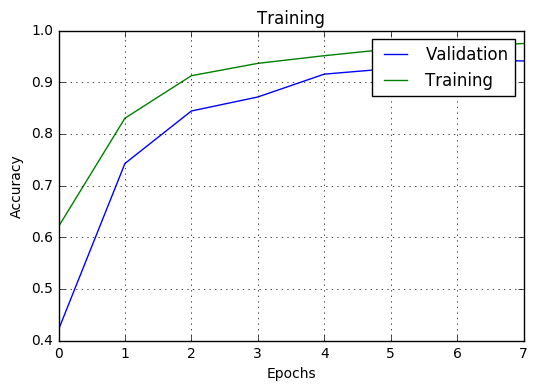


EPOCH 10 ...
Validation Accuracy = 0.955
Training Accuracy = 0.982
Saving model...
Model saved


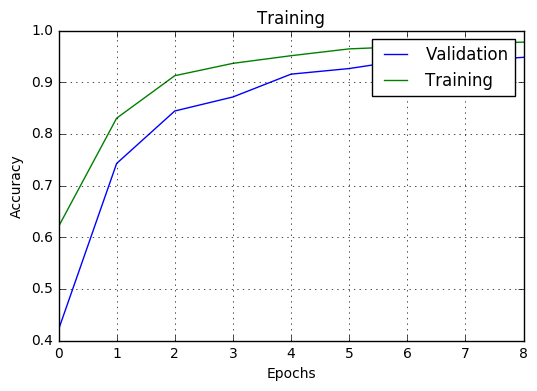


EPOCH 11 ...
Validation Accuracy = 0.953
Training Accuracy = 0.985
Saving model...
Model saved


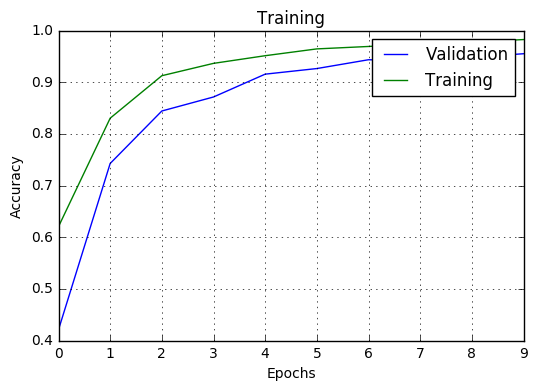


EPOCH 12 ...
Validation Accuracy = 0.971
Training Accuracy = 0.987
Saving model...
Model saved


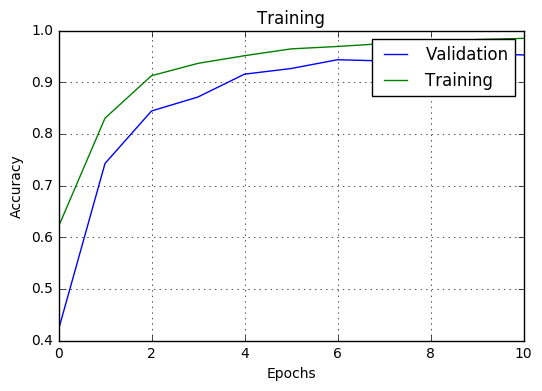


EPOCH 13 ...
Validation Accuracy = 0.958
Training Accuracy = 0.983
Saving model...
Model saved


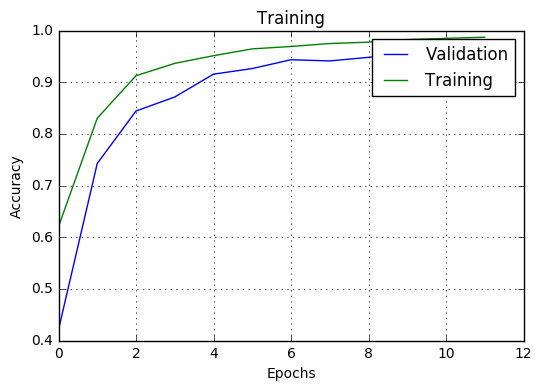


EPOCH 14 ...
Validation Accuracy = 0.971
Training Accuracy = 0.988
Saving model...
Model saved


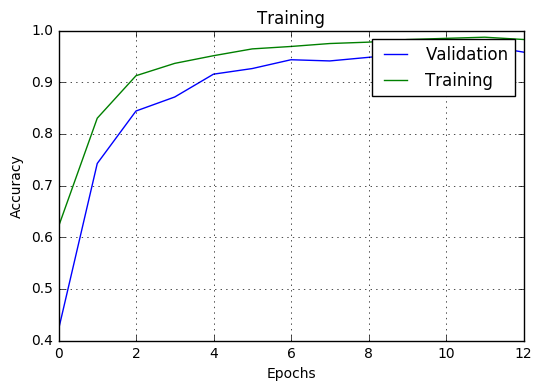


EPOCH 15 ...
Validation Accuracy = 0.972
Training Accuracy = 0.989
Saving model...
Model saved


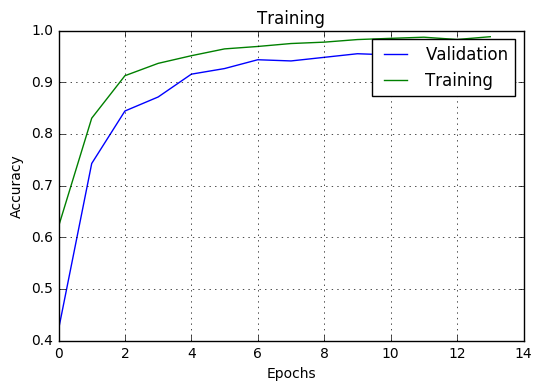

In [24]:
### Train your model here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

path = '/tmp/lenetTrafic'
valida_acura_values = np.zeros((EPOCHS,1))
train_acura_values = np.zeros((EPOCHS,1))

    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, '/tmp/lenetTrafic')
    num_examples = len(X_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        train_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        valida_acura_values[i] = validation_accuracy
        train_acura_values[i] = train_accuracy
        print("Saving model...")
        saver.save(sess, path + str(i))
        print("Model saved")
        
        e = np.arange(i)
        v = valida_acura_values[0:i]
        t = train_acura_values[0:i]
        plt.plot(e, v)
        plt.plot(e, t)
        plt.legend(['Validation', 'Training'])
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Training')
        plt.grid(True)
        plt.savefig("test.png")
        plt.show()
        
        print()
        
    #saver.save(sess, path + str(i))
    #print("Model saved")

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the stochastic optimization ADAM algorithm because the learning rate is automatically changed. This method in tensorflow has some hyperparameters but I used the defaults. I used a batch size of 128. I stop training in 15 epochs because I didn't see that more could improve the performance in the validation set. I initialize the weights in randomly way from a Gaussian distribution of mean mu equal to 0 and standard deviation sigma equal to 0.1.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I tried with different architectures. I implemented a similar idea used in the paper that had the best performance in traffic signs. In that [paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) the first layer is also feed it in into the classifier. In my case I didn't find best results with that configuration. Another idea that I tried was adding a inception module before the full connection layers. In another I used three convolutions operation.

To select the best one, first I ran the model without training ten times and average the accuracy of them (This [paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) cite another paper where suggest that accuracy of a model without training correlates well with the training model). I found that the LeNet architecture is the best one. I ran some epochs of each model prove myself that was a good insight. Furthermore this network is less complex that the others that I tried, therefore, faster.

In future I want to understand in details how to implement the architecture of this [paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). One of the obstacles to achieving this is the computing power. For this project I only use my old CPU. But as soon as Amazon attends my request g2.2xlarge instance limit increase, I will try.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

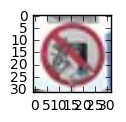

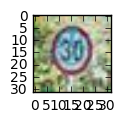

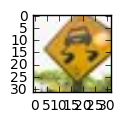

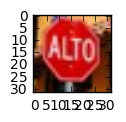

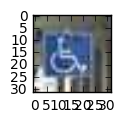

In [19]:
### Load the images and plot them here.
import matplotlib.image as mpimg
import os
img_path = os.getcwd() + '\mySigns'
#print ("The current working directory is", a)

img = np.zeros((5,32,32,3)) #images
for i in range(5):
    file_name = '\img' + str(i) + '.png'
    img[i] = mpimg.imread(img_path + file_name)
                  
for i in range(5):
    image = img[i]
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show()

### Feel free to use as many code cells as needed.



In [26]:
#This code is for evaluate the accuracy in the original test set

X_test = (X_test - 127.5) / 127.5 #zero mean and equal variance
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, '/tmp/lenetTrafic14')
    
    tf.argmax(logits, 1)

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.935


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I selected two images that the signal has physical damage ("don't turn left" and "max 30 km") and another one that is in another language ("stop" signal in Spanish). The another two images I think are normal.

lebel = [4]
description = Speed limit (70km/h)


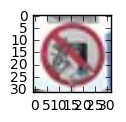

lebel = [1]
description = Speed limit (30km/h)


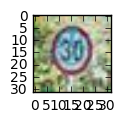

lebel = [13]
description = Yield


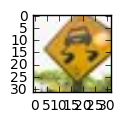

lebel = [14]
description = Stop


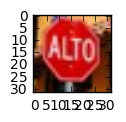

lebel = [38]
description = Keep right


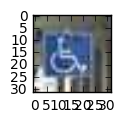

In [20]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
X_img = (img - 0.5) / 0.5 #zero mean and equal variance
prediction = tf.argmax(logits, 1)
a = np.zeros((1,32,32,3))
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, '/tmp/lenetTrafic14')
    for i in range(0,5):
        a[0] = X_img[i]
        p = sess.run(prediction, feed_dict={x: a, keep_prob: 1})
        print("lebel = {}".format(p))
        print("description = {}".format(_list[p[0]][1]) )
        image = img[i]
        plt.figure(figsize=(1,1))
        plt.imshow(image)
        plt.show()

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

It is performed poorly, only achieve 40% accurate as in the test set was 93.5%. Perhaps the wrong prediction images don’t have equivalent signals in German or are very different.

Probabilities = [[  1.24172429e-02   5.32452436e-03   2.26822915e-04   6.79812899e-07
    8.44352365e-01   6.14722595e-02   3.06307309e-04   6.88169673e-02
    4.77662263e-03   1.23012256e-07   1.98520930e-03   1.08169040e-09
    2.70745746e-04   1.28361785e-06   4.00361641e-05   3.58221746e-06
    6.87124455e-08   4.11236624e-06   7.97922084e-09   1.71326775e-08
    4.28022551e-09   1.44624543e-08   1.30279381e-12   7.79230500e-12
    1.79035439e-10   7.33621885e-10   3.58477337e-08   1.00533937e-12
    3.02828784e-09   1.17012622e-09   4.09599542e-11   3.62824920e-07
    2.02559214e-08   5.08023276e-11   5.67248342e-14   2.37156383e-09
    8.27476542e-12   4.11524184e-08   1.07024207e-11   3.50091049e-08
    3.74652956e-07   2.41130345e-11   1.07274779e-07]]


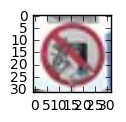

Probabilities = [[  1.69710964e-02   8.80638719e-01   2.37724259e-02   1.37138773e-06
    7.81155974e-02   3.39058432e-04   3.78587089e-07   2.62616663e-06
    9.74403520e-05   3.24990729e-12   3.58726278e-11   2.89652385e-10
    1.31012123e-09   1.01736763e-09   3.75322234e-05   4.44471152e-06
    4.02730063e-12   3.58548641e-06   2.10671374e-06   9.21597651e-13
    1.87531395e-08   5.79972494e-11   2.15068241e-11   4.57373993e-13
    1.56190783e-10   6.32373043e-10   2.56725619e-09   3.79059062e-10
    3.37889389e-07   5.76822368e-09   1.00064151e-10   7.58604912e-09
    1.14495851e-05   4.53007423e-11   4.93488361e-10   8.42549825e-13
    3.78717252e-10   1.91758803e-10   4.67798387e-08   3.22583127e-10
    1.62817184e-06   3.80006478e-11   9.10193348e-14]]


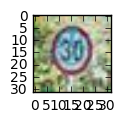

Probabilities = [[  4.27902387e-06   9.01134172e-07   3.61444700e-06   4.13364830e-07
    1.55165128e-06   5.94996527e-06   1.58431881e-08   4.06864986e-09
    1.09406955e-07   6.29134447e-05   1.38495088e-04   1.56807778e-09
    3.25286165e-02   4.89652842e-01   4.60264027e-01   3.17152037e-04
    3.76442150e-13   1.69614051e-02   7.69960664e-08   2.00014467e-11
    2.26402754e-08   1.22721708e-08   7.71944656e-07   4.80757031e-11
    2.94819551e-11   5.21730508e-05   4.51702499e-06   6.63792345e-14
    3.28408256e-09   4.25581570e-09   5.47563506e-09   2.21574457e-08
    5.05729361e-08   1.70590729e-11   4.22728389e-12   5.07906772e-10
    5.49546963e-10   1.41121488e-08   4.96576185e-08   3.55988267e-10
    5.11134919e-11   1.72386605e-09   9.58985669e-10]]


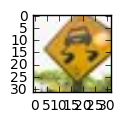

Probabilities = [[  1.41476349e-07   2.33367086e-06   2.79719343e-16   8.76862189e-23
    1.02724503e-13   3.49332375e-15   3.42519593e-22   5.72992866e-24
    2.14110355e-22   1.15561506e-24   1.38533909e-17   6.79108821e-21
    1.36523701e-15   3.15032088e-18   9.99968648e-01   1.78353210e-18
    3.97933097e-31   2.88586707e-05   5.95430552e-14   3.69645131e-28
    8.90120959e-22   8.11409504e-18   7.45617917e-24   6.86615617e-30
    5.29070482e-27   1.01868866e-14   4.32941395e-19   5.38490953e-30
    4.04818678e-22   2.13439546e-19   6.14054933e-22   1.96031736e-15
    2.76672427e-17   1.51433272e-27   1.57054005e-29   2.05535687e-32
    7.90123574e-31   3.30536853e-23   4.98303870e-23   1.54217206e-31
    6.49257213e-21   4.32408583e-25   1.24980530e-29]]


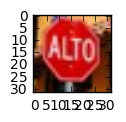

Probabilities = [[  6.48529294e-15   8.39534042e-09   6.01209568e-11   2.98300895e-09
    1.26544965e-15   4.14902279e-10   8.00009872e-08   1.05228110e-15
    3.06691555e-14   4.04969027e-13   4.27160932e-17   1.50279109e-10
    2.70488597e-11   3.17487252e-11   9.29566076e-14   1.63076018e-14
    1.59164174e-17   5.87986079e-16   1.10969831e-10   6.25102206e-21
    8.54676486e-12   2.61531685e-19   8.53049264e-20   5.18507579e-18
    1.47564094e-20   2.43694778e-12   2.02556918e-14   5.97190839e-16
    9.85628205e-14   8.70631914e-18   8.34305176e-15   3.14052690e-21
    2.69281263e-05   3.46207298e-06   1.40090799e-02   1.55955013e-06
    3.19627252e-05   1.08112874e-09   8.90304089e-01   1.42939738e-09
    9.56166163e-02   6.22183188e-06   2.90075572e-08]]


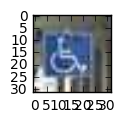

In [21]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

probabilities = tf.nn.softmax(logits)
a = np.zeros((1,32,32,3))
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, '/tmp/lenetTrafic14')
    for i in range(0,5):
        a[0] = X_img[i]
        p = sess.run(probabilities, feed_dict={x: a, keep_prob: 1})
        #v = p.values.item()
        print("Probabilities = {}".format(p))
        image = img[i]
        plt.figure(figsize=(1,1))
        plt.imshow(image)
        plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Four of the five predictions were made in a certain manner although only two are correct. Only one was made like flipping coin and no matter what face will be, booth are wrong. In all of the wrong predictions, none of top five probable labels are the correct answer. 
Its worth to note that one of the correct prediction was made with a probability of one despite the fact that there are Spanish letters in the traffic sign. Perhaps in this case the color has a strong influence and the details (the letters) doesn´t matter because are few others traffic signs similar in the training set. But in the another’s like in the "disabled parking only" are very similar in color but different in the details.

I think that best quality (best resolution) images can have a big impact in the accuracy of the model. Furthermore more deep convNet need to be tested to see if can capture the details in low quality images.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

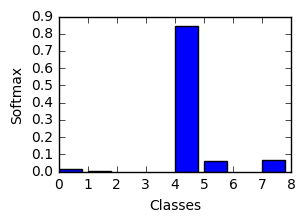

0.8444 probability to be ['4', 'Speed limit (70km/h)']
0.0688 probability to be ['7', 'Speed limit (100km/h)']
0.0615 probability to be ['5', 'Speed limit (80km/h)']
0.0124 probability to be ['0', 'Speed limit (20km/h)']
0.0053 probability to be ['1', 'Speed limit (30km/h)']


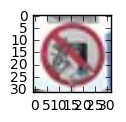

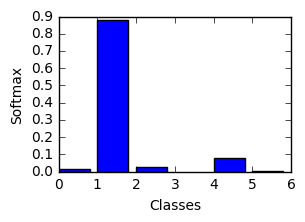

0.8806 probability to be ['1', 'Speed limit (30km/h)']
0.0781 probability to be ['4', 'Speed limit (70km/h)']
0.0238 probability to be ['2', 'Speed limit (50km/h)']
0.0170 probability to be ['0', 'Speed limit (20km/h)']
0.0003 probability to be ['5', 'Speed limit (80km/h)']


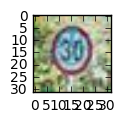

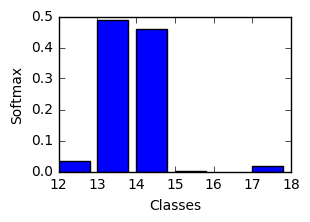

0.4897 probability to be ['13', 'Yield']
0.4603 probability to be ['14', 'Stop']
0.0325 probability to be ['12', 'Priority road']
0.0170 probability to be ['17', 'No entry']
0.0003 probability to be ['15', 'No vehicles']


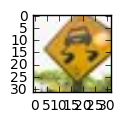

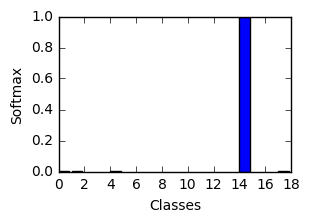

1.0000 probability to be ['14', 'Stop']
0.0000 probability to be ['17', 'No entry']
0.0000 probability to be ['1', 'Speed limit (30km/h)']
0.0000 probability to be ['0', 'Speed limit (20km/h)']
0.0000 probability to be ['4', 'Speed limit (70km/h)']


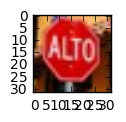

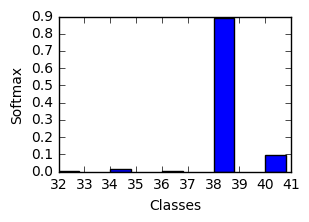

0.8903 probability to be ['38', 'Keep right']
0.0956 probability to be ['40', 'Roundabout mandatory']
0.0140 probability to be ['34', 'Turn left ahead']
0.0000 probability to be ['36', 'Go straight or right']
0.0000 probability to be ['32', 'End of all speed and passing limits']


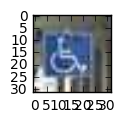

In [38]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

certainty = tf.nn.top_k(probabilities, k=5)
a = np.zeros((1,32,32,3))
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, '/tmp/lenetTrafic14')
    for i in range(0,5):
        a[0] = X_img[i]
        p = sess.run(certainty, feed_dict={x: a, keep_prob: 1})
        
        plt.figure(figsize=(3,2))
        plt.bar(p.indices[0],p.values[0])
        plt.xlabel('Classes')
        plt.ylabel('Softmax')
        plt.show()
        
        for j in range(5):
            print("{:.4f} probability to be {}".format(p.values.item(j),_list[p.indices.item(j)])) 
        
        image = img[i]
        plt.figure(figsize=(1,1))
        plt.imshow(image)
        plt.show()